**Regression**

predict a continuous numerical value by finding the relationship between input variables (features) and an output variable (target).

In [1]:
import pandas as pd     # DataFrame operations
import numpy as np       # Numerical calculations

# Visualization libraries
import matplotlib.pyplot as plt  # Basic plots
import seaborn as sns            # Advanced statistical plots

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error


**DATA LOADING**

In [9]:
df = pd.read_csv("/content/house_price_pridiction.csv")
# Load CSV file into DataFrame

In [10]:
df.head()
# Display first 5 rows

,square_feet,num_rooms,age,distance_to_city(km),price
0,2248.357077,3,92,22.997972,200374.0904
1,1930.867849,2,22,13.984254,268784.8473
2,2323.844269,6,33,21.500945,315020.8577
3,2761.514928,3,63,10.343638,355111.4685
4,1882.923313,7,54,25.485200,234197.1239


**Exploratory Data Analysis (EDA)**

Data overview the data

In [11]:
df.info()
# Shows column names, data types, non-null counts

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 5 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   square_feet           10000 non-null  float64
 1   num_rooms             10000 non-null  int64  
 2   age                   10000 non-null  int64  
 3   distance_to_city(km)  10000 non-null  float64
 4   price                 10000 non-null  float64
dtypes: float64(3), int64(2)
memory usage: 390.8 KB


In [12]:
df.describe()
# Gives mean, std, min, max – useful for regression understanding

,square_feet,num_rooms,age,distance_to_city(km),price
count,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,1999.147496,4.49510,49.516900,15.362148,263011.571609
std,501.021194,1.71116,28.992336,8.325101,98336.945117
min,500.000000,2.00000,0.000000,1.000161,-95613.138250
25%,1663.704735,3.00000,24.000000,8.121636,196791.510700
50%,1998.702513,4.00000,49.000000,15.403146,262497.361250
75%,2335.540444,6.00000,75.000000,22.447530,330445.581875
max,3963.118853,7.00000,99.000000,29.993892,660168.255600


In [13]:
# Checking for duplicated rows
df.duplicated()

,0
0,False
1,False
2,False
3,False
4,False
...,...
9995,False
9996,False
9997,False
9998,False


In [16]:

df.size #no. of elements

50000

In [15]:
df.shape #no. of rows and columns

(10000, 5)

In [17]:
df.dtypes

,0
square_feet,float64
num_rooms,int64
age,int64
distance_to_city(km),float64
price,float64


Target Variable Distribution (Histogram)

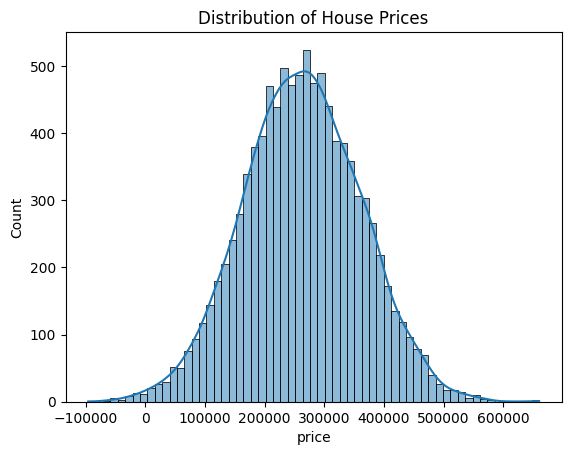

In [19]:
sns.histplot(df['price'], kde=True)
plt.title("Distribution of House Prices")


# histplot shows distribution of Price
# kde=True adds smooth density curve

plt.show()
# show() displays the plot

Box Plot (Outlier Detection – Regression Relevant)

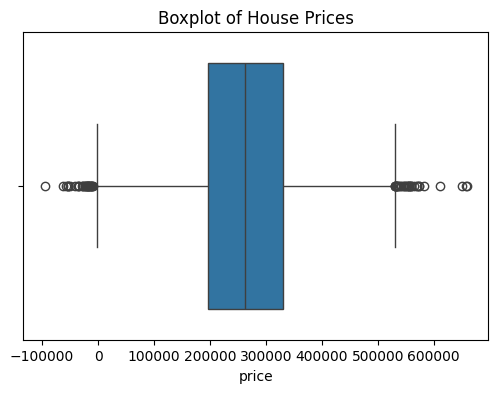

In [20]:
plt.figure(figsize=(6,4))
sns.boxplot(x=df['price'])
plt.title("Boxplot of House Prices")
plt.show()

Feature vs Target Scatter Plots

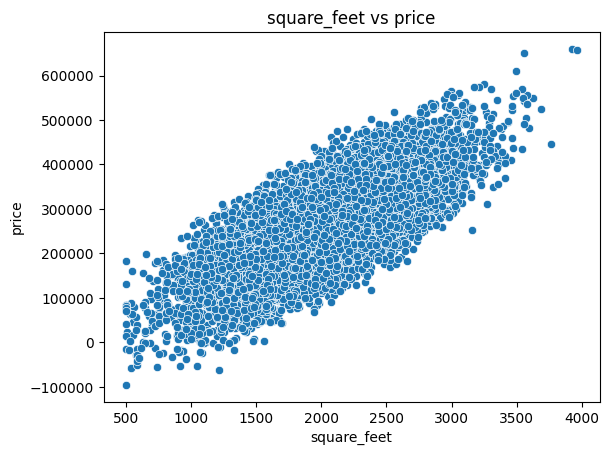

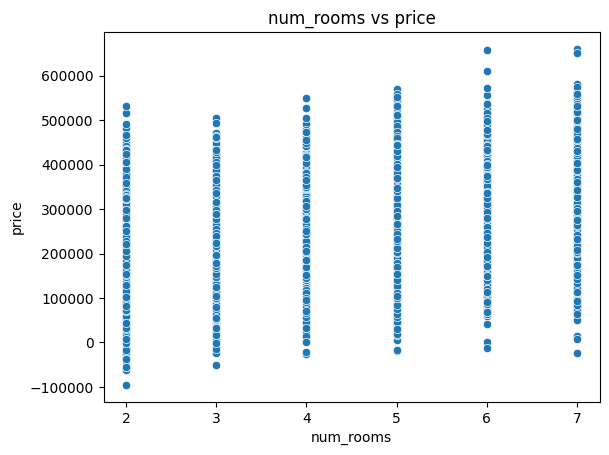

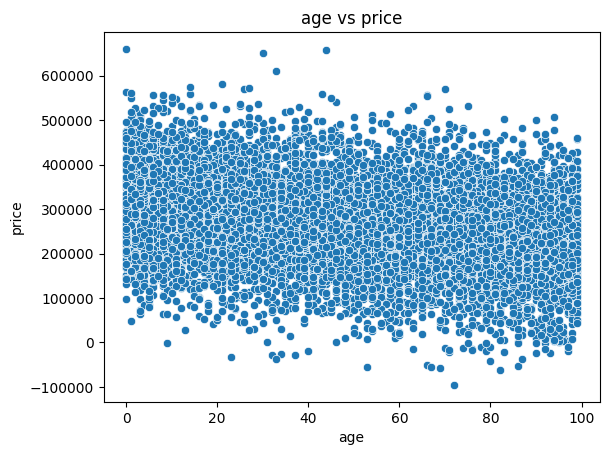

In [21]:
# Plot first 3 numerical features vs Price
num_cols = df.select_dtypes(include='number').columns

for col in num_cols[:3]:
    if col != 'price':
        sns.scatterplot(x=df[col], y=df['price'])
        plt.title(f"{col} vs price")
        plt.show()


Correlation Heatmap

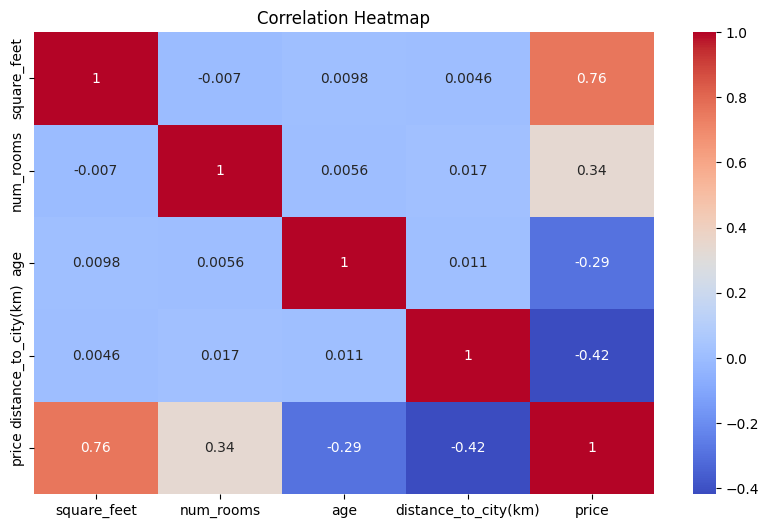

In [22]:
plt.figure(figsize=(10,6))
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap='coolwarm')
plt.title("Correlation Heatmap")
plt.show()

**Data Cleaning & Manipulation**

Data cleaning is the process of fixing missing, incorrect, or inconsistent data.

🔹 Why we use it

ML models cannot handle missing or invalid values

In [33]:
df.isnull().sum()
# Count missing values in each column

,0
square_feet,0
num_rooms,0
age,0
distance_to_city(km),0
price,0


**Categorical Encoding**

In [37]:
df = pd.get_dummies(df, drop_first=True)
# Converts categorical columns into numeric
df.tail() #it will show last 5 rows

,square_feet,num_rooms,age,distance_to_city(km),price
9995,2650.551032,7,9,18.126034,431344.267800
9996,1000.827516,2,53,24.479692,6650.271134
9997,1647.341638,5,80,2.189312,233698.384300
9998,2247.882787,6,73,27.931014,280766.827400
9999,2322.194227,7,73,10.595721,342895.309100


**Feature Selection (X & y)**

Feature selection is choosing relevant features that influence the target.

🔹 Why we use it

Removes noise

Improves model stability

X → Independent variables (4),
y → Dependent variable (price)

In [23]:
X = data[['square_feet', 'num_rooms', 'age', 'distance_to_city(km)']]
y = data['price']


**Feature Scaling**

Feature scaling standardizes feature values to a common range.

🔹 Why we use it

Linear models are sensitive to scale

Improves convergence

In [24]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
# Standardizes features to mean=0, std=1

**Train–Test Split**

Splitting data into training and testing sets.

🔹 Why we use it

To test model on unseen data

80% training, 20% testing

In [38]:
X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y,
    test_size=0.2,
    random_state=42
)


# **Model training**

Training means teaching the model to learn relationship between X and y.

🔹 Why we use Linear Regression

Simple

Interpretable

Suitable for continuous target

In [39]:
model = LinearRegression()  # Create model
model.fit(X_train, y_train) ## Train model

LinearRegression()


**Prediction**

In [29]:
y_pred = model.predict(X_test)


**Model Evaluation**

Metrics measure how well the model performs.

🔹 Why we use them

To quantify prediction error

In [40]:
r2 = r2_score(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)

print("R2 Score:", r2)    # Variance explained
print("MSE:", mse)        # Squared error
print("RMSE:", rmse)      # Root mean squared error


R2 Score: 0.960063695758279
MSE: 386443817.49812317
RMSE: 19658.17431752306


Actual vs Predicted Plot

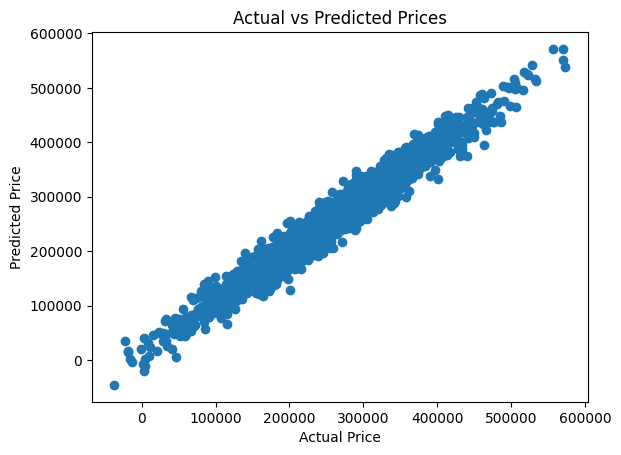

In [41]:
plt.scatter(y_test, y_pred)
plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")
plt.title("Actual vs Predicted Prices")
plt.show()
#Perfect model → straight diagonal line.

**Coefficients Interpretation**

In [31]:
coefficients = pd.DataFrame(
    model.coef_,
    X.columns,
    columns=['Coefficient']
)

coefficients


,Coefficient
square_feet,75045.448679
num_rooms,34415.659201
age,-29089.533143
distance_to_city(km),-41722.990136


In [42]:
print("Intercept:", model.intercept_)


Intercept: 262892.7055462394


**model inference**

After a model is trained and saved, inference is the step where we load the model and use it to predict outputs for real-world inputs.

In [44]:
# Saving the trained multiple linear regression model

import joblib

joblib.dump(model, "house_price_regression_model.pkl")


['house_price_regression_model.pkl']

In [45]:
# Check saved file
import os
os.listdir("/content")


['.config',
 'house_price_regression_model.pkl',
 'house_price_pridiction.csv',
 'sample_data']

In [46]:
# Loading the trained model for inference

import joblib

loaded_model = joblib.load("/content/house_price_regression_model.pkl")


In [47]:
# New house details for prediction (inference)

new_house = {
    "square_feet": 1800,
    "num_rooms": 3,
    "age": 8,
    "distance_to_city(km)": 6
}


In [48]:
import pandas as pd

new_house_df = pd.DataFrame([new_house])


In [49]:
# Apply scaling using the same scaler used during training
new_house_scaled = scaler.transform(new_house_df)


In [50]:
# Predict house price using loaded model

predicted_price = loaded_model.predict(new_house_scaled)

print("Predicted House Price:", predicted_price[0])


Predicted House Price: 291571.13318541384
